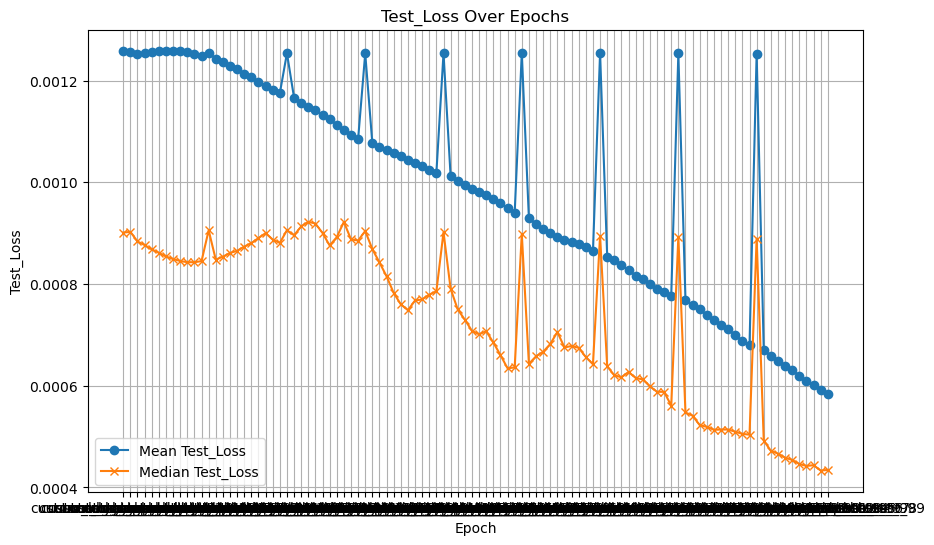

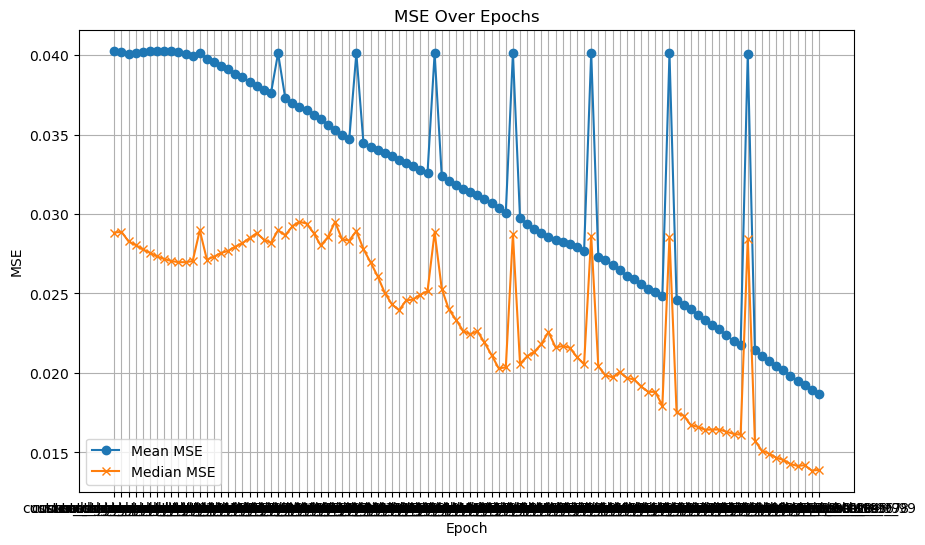

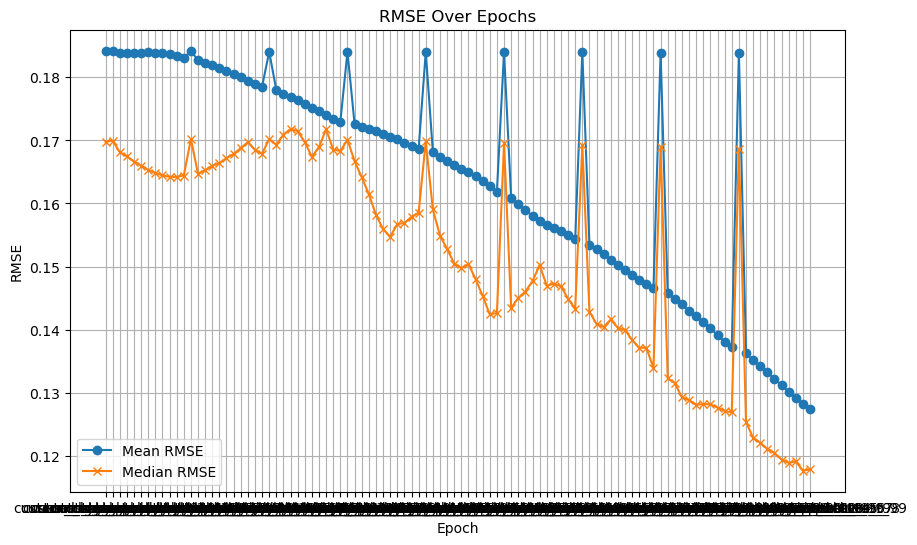

Epoch summary saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\epoch_summary.csv
Plots saved to the same directory: C:\Users\User\Documents\ADR\Viz Testing\test_log_data


In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in sorted(os.listdir(folder_path)):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics lists
        test_losses = []
        rmses = []
        mses = []

        # Extract data for each step
        for step in data['steps']:
            test_loss = step.get('test_loss', 0)
            predictions = np.array(step.get('actions_pred', [0]))
            labels = np.array(step.get('labels', [0]))

            # Calculate metrics
            mse = np.mean((predictions - labels) ** 2)
            rmse = np.sqrt(mse)

            # Append to lists
            test_losses.append(test_loss)
            mses.append(mse)
            rmses.append(rmse)

        # Compute mean and median for the epoch
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Test_Loss': np.mean(test_losses),
            'Median_Test_Loss': np.median(test_losses),
            'Mean_MSE': np.mean(mses),
            'Median_MSE': np.median(mses),
            'Mean_RMSE': np.mean(rmses),
            'Median_RMSE': np.median(rmses),
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
df = pd.DataFrame(epoch_data)
csv_file = os.path.join(folder_path, "epoch_summary.csv")
df.to_csv(csv_file, index=False)

# Plotting the metrics
metrics_to_plot = ['Test_Loss', 'MSE', 'RMSE']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x')
    plt.title(f'{metric} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plot_file = os.path.join(folder_path, f'{metric.lower()}_plot.png')
    plt.savefig(plot_file)  # Save the plot as PNG
    plt.show()

print(f"Epoch summary saved to: {csv_file}")
print(f"Plots saved to the same directory: {folder_path}")


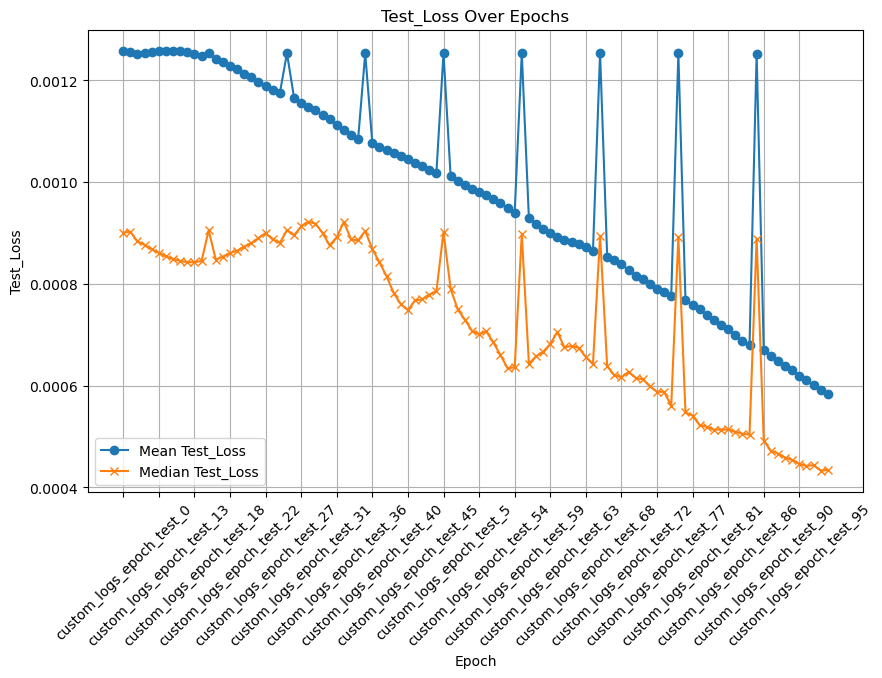

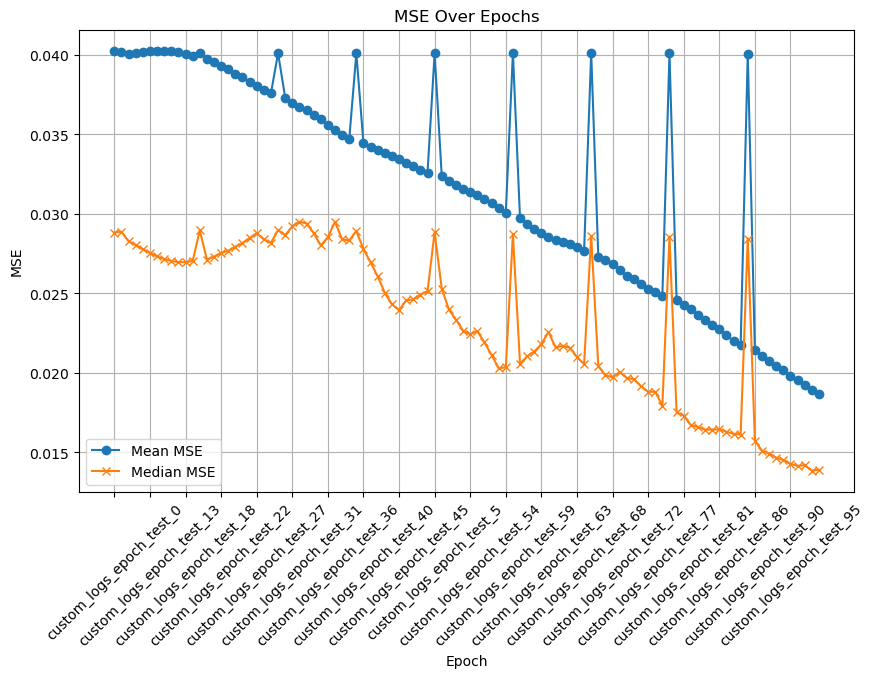

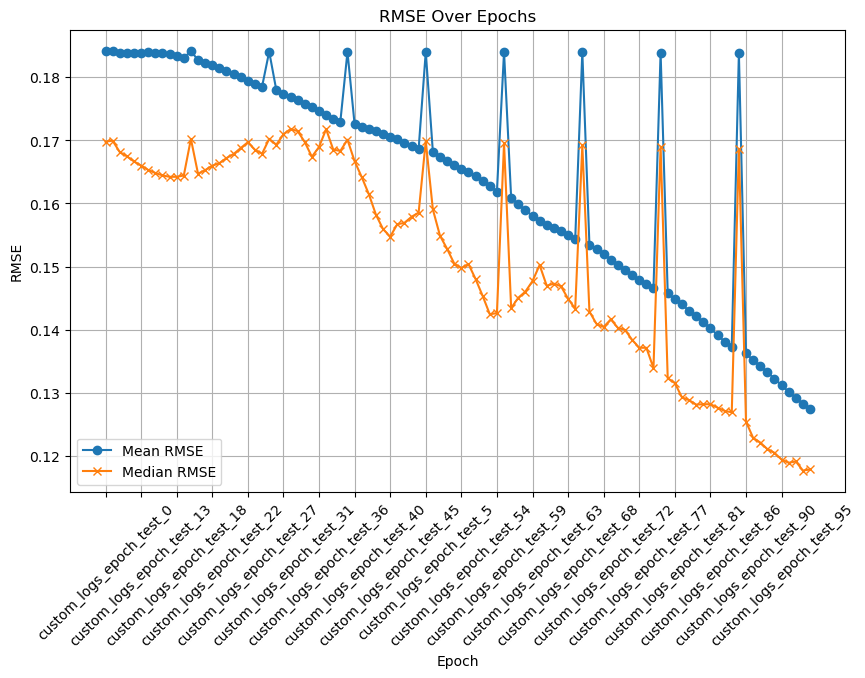

Epoch summary saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\epoch_summary.csv
Plots saved to the same directory: C:\Users\User\Documents\ADR\Viz Testing\test_log_data


In [2]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in sorted(os.listdir(folder_path)):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics lists
        test_losses = []
        rmses = []
        mses = []

        # Extract data for each step
        for step in data['steps']:
            test_loss = step.get('test_loss', 0)
            predictions = np.array(step.get('actions_pred', [0]))
            labels = np.array(step.get('labels', [0]))

            # Calculate metrics
            mse = np.mean((predictions - labels) ** 2)
            rmse = np.sqrt(mse)

            # Append to lists
            test_losses.append(test_loss)
            mses.append(mse)
            rmses.append(rmse)

        # Compute mean and median for the epoch
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Test_Loss': np.mean(test_losses),
            'Median_Test_Loss': np.median(test_losses),
            'Mean_MSE': np.mean(mses),
            'Median_MSE': np.median(mses),
            'Mean_RMSE': np.mean(rmses),
            'Median_RMSE': np.median(rmses),
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
df = pd.DataFrame(epoch_data)
csv_file = os.path.join(folder_path, "epoch_summary.csv")
df.to_csv(csv_file, index=False)

# Plotting the metrics with x-axis at 20-epoch intervals
metrics_to_plot = ['Test_Loss', 'MSE', 'RMSE']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x')

    # Set x-axis with intervals of 20 epochs
    plt.xticks(rotation=45)
    step_size = max(1, len(df['Epoch']) // 20)  # Adjust step size for labeling
    plt.xticks(df['Epoch'][::step_size])

    plt.title(f'{metric} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()

    # Save the plot as PNG
    plot_file = os.path.join(folder_path, f'{metric.lower()}_plot.png')
    plt.savefig(plot_file)
    plt.show()

print(f"Epoch summary saved to: {csv_file}")
print(f"Plots saved to the same directory: {folder_path}")


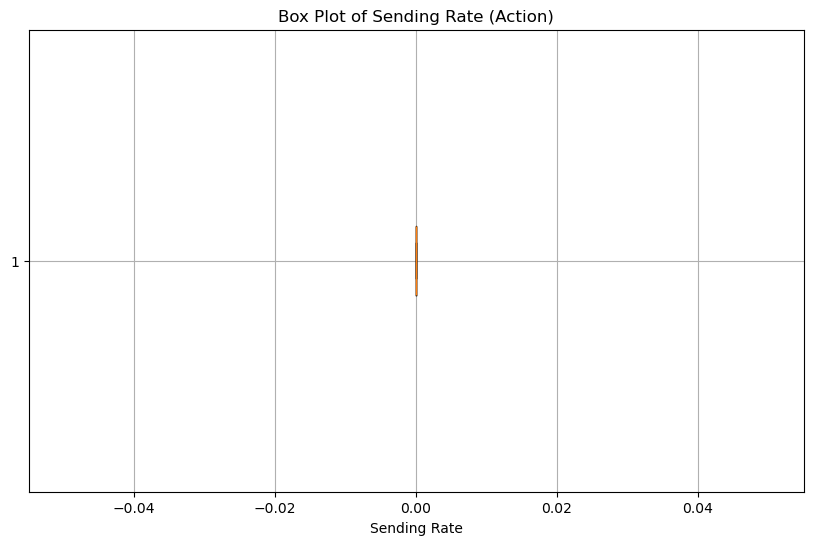

Box plot saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\sending_rate_boxplot.png


In [3]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store sending rate data
sending_rates = []

# Process each JSON file
for file in sorted(os.listdir(folder_path)):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract sending rate (action) for each step
        for step in data['steps']:
            sending_rate = step.get('sending_rate', 0)  # Use the sending_rate as the action
            sending_rates.append(sending_rate)

# Create a DataFrame for easier plotting
df_sending_rate = pd.DataFrame(sending_rates, columns=["SendingRate"])

# Plotting a box plot for sending rate
plt.figure(figsize=(10, 6))
plt.boxplot(df_sending_rate["SendingRate"], vert=False)
plt.title('Box Plot of Sending Rate (Action)')
plt.xlabel('Sending Rate')
plt.grid(True)
plt.savefig(os.path.join(folder_path, 'sending_rate_boxplot.png'))  # Save plot as PNG
plt.show()

print(f"Box plot saved to: {os.path.join(folder_path, 'sending_rate_boxplot.png')}")


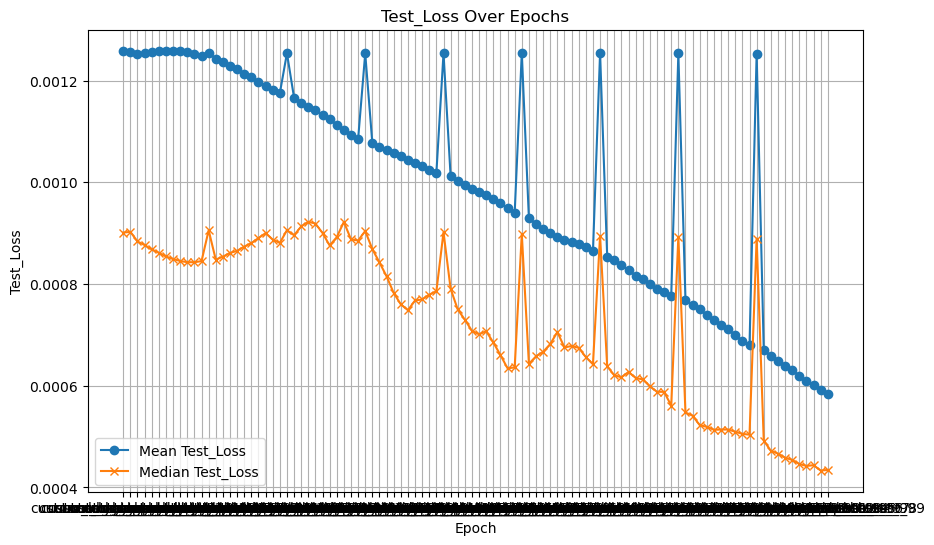

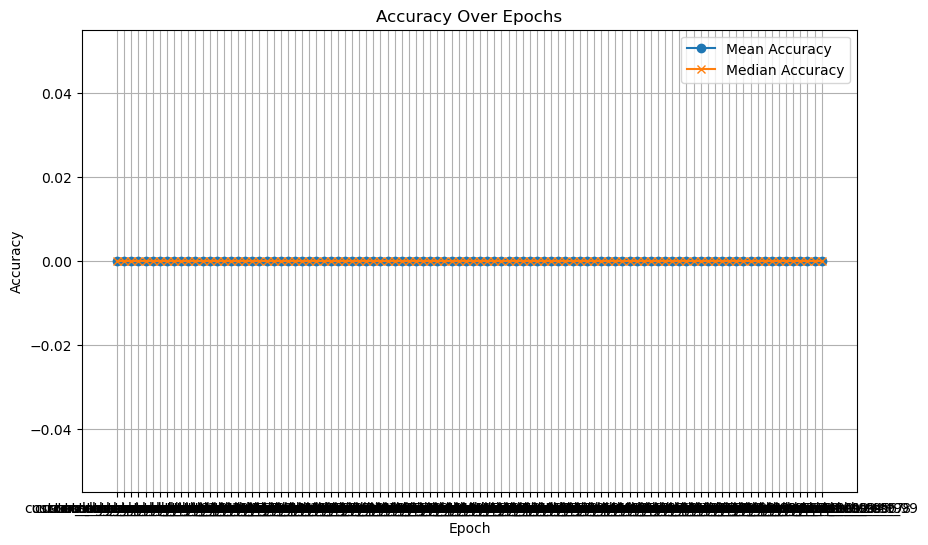

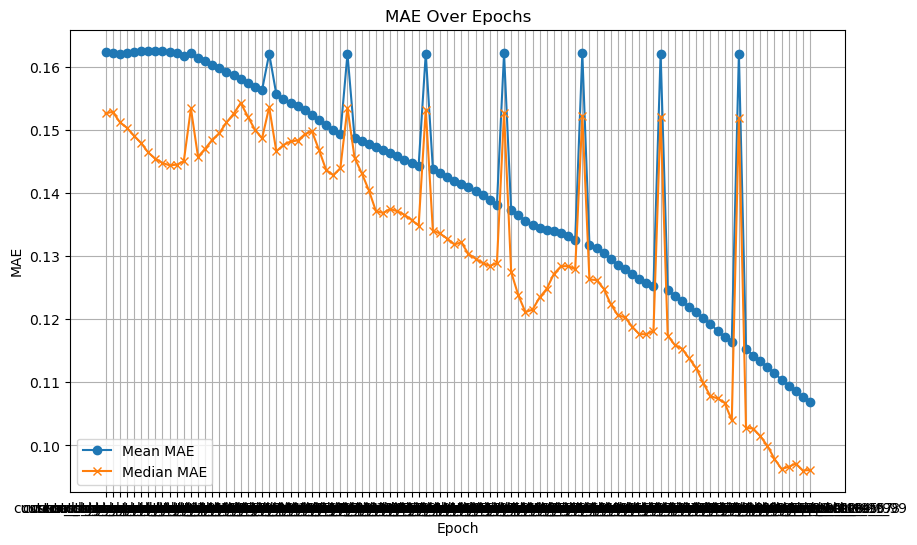

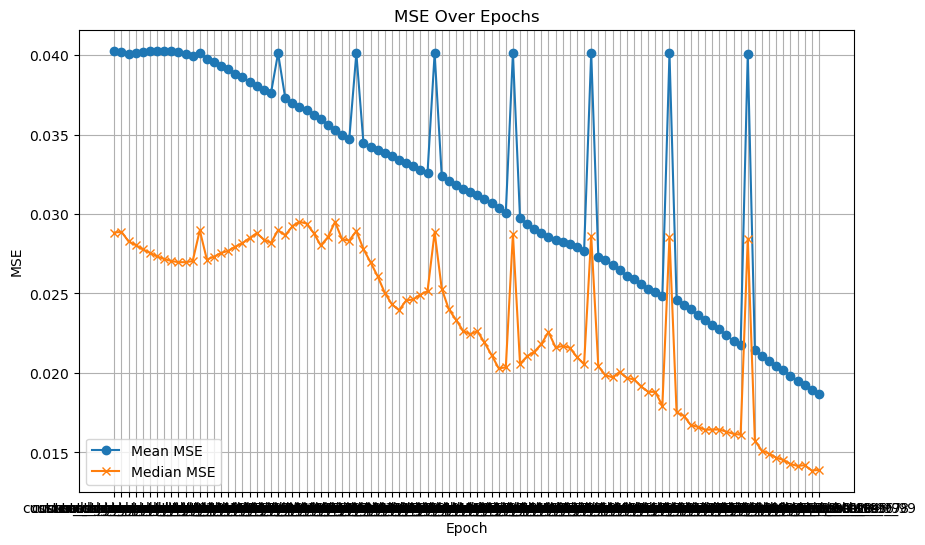

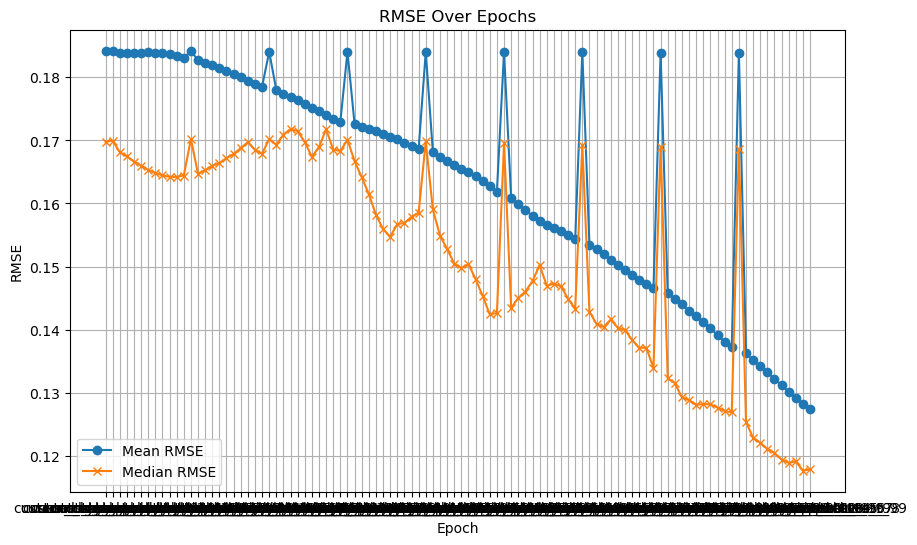

In [3]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in os.listdir(folder_path):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics dictionary to store values for each file
        metrics = {
            'test_loss': [], 
            'actions_pred': [], 
            'labels': [], 
            'returns': [], 
            'accuracy': [], 
            'mae': [], 
            'mse': [], 
            'rmse': []
        }
        
        # Extract data from each step (assuming each step contains the mentioned metrics)
        for step in data['steps']:  # Assuming 'steps' contains the 30 steps in one epoch
            # Collect the metrics
            metrics['test_loss'].append(step['test_loss'])
            metrics['actions_pred'].append(step['actions_pred'])
            metrics['labels'].append(step['labels'])
            metrics['returns'].append(step['returns'])
            
            # Calculate accuracy: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                actions_pred = np.array(step['actions_pred'])
                labels = np.array(step['labels'])
                
                # Calculate Accuracy
                accuracy = np.mean(actions_pred == labels)
                metrics['accuracy'].append(accuracy)
                
                # Calculate MAE
                mae = np.mean(np.abs(actions_pred - labels))
                metrics['mae'].append(mae)
                
                # Calculate MSE
                mse = np.mean((actions_pred - labels) ** 2)
                metrics['mse'].append(mse)
                
                # Calculate RMSE
                rmse = np.sqrt(mse)
                metrics['rmse'].append(rmse)

        # Compute mean and median for each metric over the steps in this file (representing one epoch)
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Test_Loss': np.mean(metrics['test_loss']),
            'Median_Test_Loss': np.median(metrics['test_loss']),
            'Mean_Returns': np.mean(metrics['returns']),
            'Median_Returns': np.median(metrics['returns']),
            'Mean_Accuracy': np.mean(metrics['accuracy']),
            'Median_Accuracy': np.median(metrics['accuracy']),
            'Mean_MAE': np.mean(metrics['mae']),
            'Median_MAE': np.median(metrics['mae']),
            'Mean_MSE': np.mean(metrics['mse']),
            'Median_MSE': np.median(metrics['mse']),
            'Mean_RMSE': np.mean(metrics['rmse']),
            'Median_RMSE': np.median(metrics['rmse'])
        }
        epoch_data.append(epoch_summary)

# # Save the collected data to a CSV file
# csv_file = "epoch_summary.csv"
# df = pd.DataFrame(epoch_data)
# df.to_csv(csv_file, index=False)

# Plotting the metrics
metrics_to_plot = ['Test_Loss', 'Accuracy', 'MAE', 'MSE', 'RMSE']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x')
    plt.title(f'{metric} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.savefig(f'{metric.lower()}_plot.png')  # Save the plot as PNG
    plt.show()


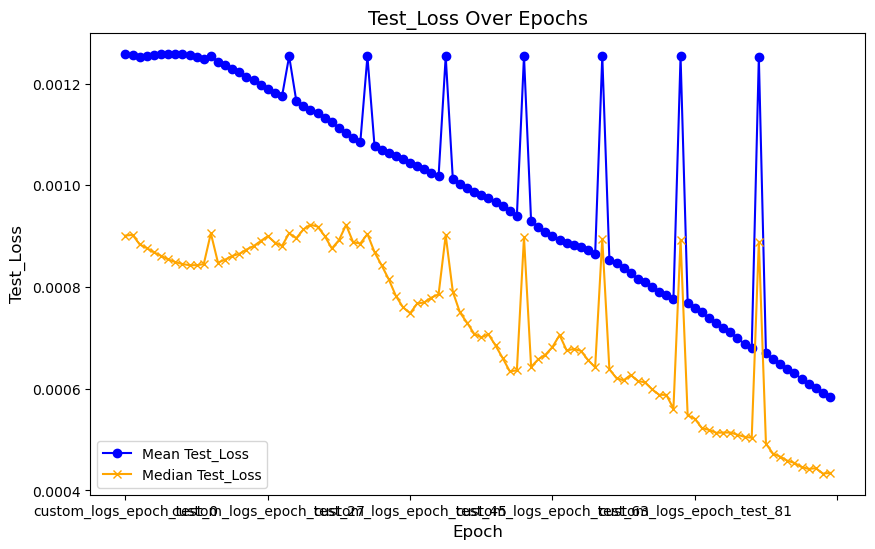

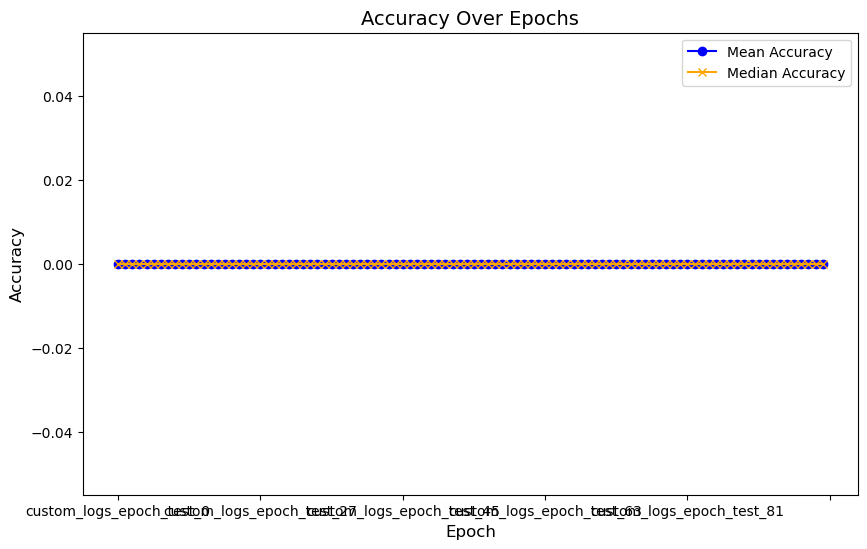

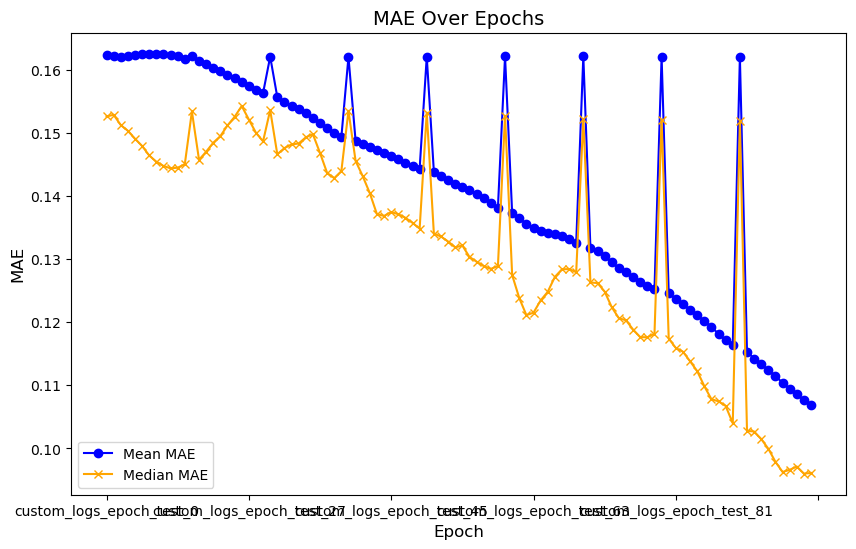

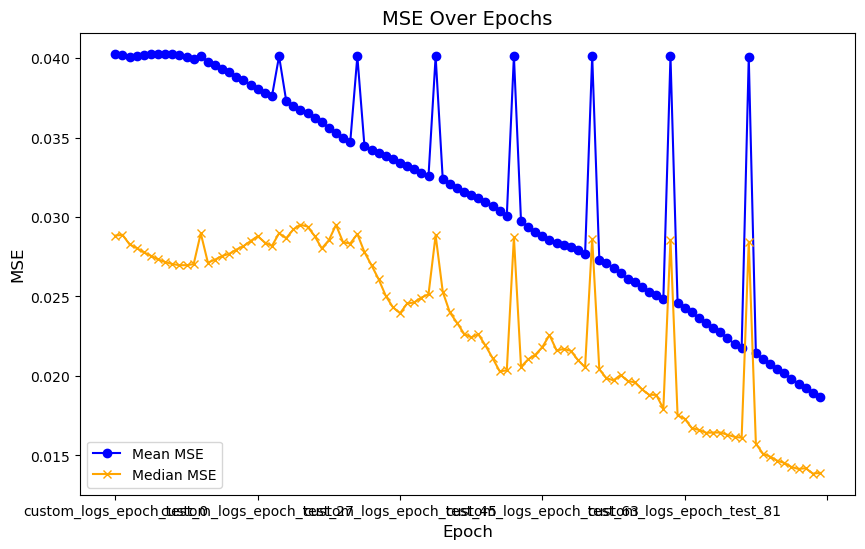

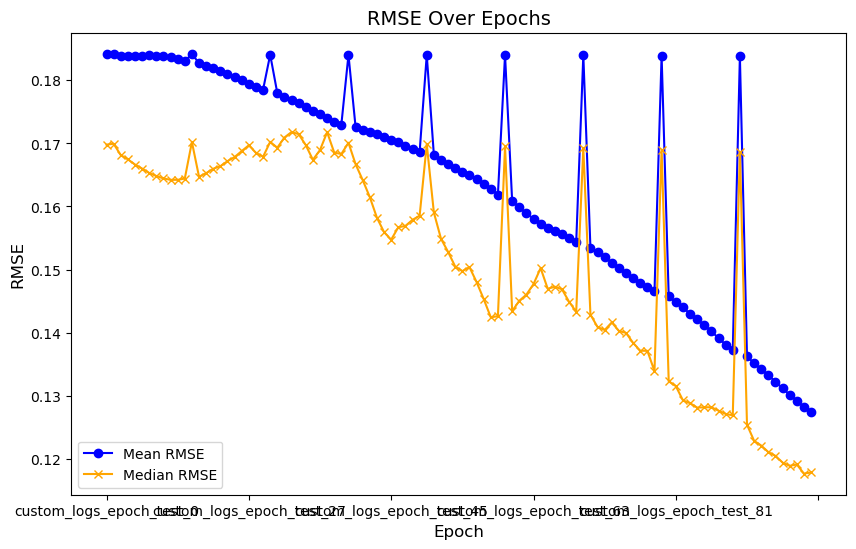

In [4]:
import matplotlib.pyplot as plt

# Plotting the metrics
metrics_to_plot = ['Test_Loss', 'Accuracy', 'MAE', 'MSE', 'RMSE']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))

    # Plot mean and median metrics
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o', color='blue')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x', color='orange')

    # Customizing x-axis labels
    plt.xticks(ticks=range(0, 101, 20))  # Set x-axis ticks at intervals of 20

    # Title and labels
    plt.title(f'{metric} Over Epochs', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel(metric, fontsize=12)

    # Remove background grid lines
    plt.grid(False)

    # Plain background
    plt.gca().set_facecolor('white')  # Set plot background to plain white

    # Add legend
    plt.legend(fontsize=10)

    # Save the plot as PNG
    plt.savefig(f'{metric.lower()}_plot.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


In [11]:
csv_path = r"C:\Users\User\Documents\ADR\encoded_file.csv"

In [15]:
import pandas as pd
df = pd.read_csv(csv_path)

# Split the data into separate DataFrames based on the CCAs column
cca_groups = df.groupby('CCAs')


# Save each group as a separate CSV file
output_paths = {}
for cca, group in cca_groups:
    output_file = f'encoded_CCA_{cca}.csv'
    group.to_csv(output_file, index=False)
    output_paths[cca] = output_file

output_paths


{0: 'encoded_CCA_0.csv', 1: 'encoded_CCA_1.csv', 2: 'encoded_CCA_2.csv'}